In [23]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch
from kan import *

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[4,5,2], grid=5, k=3, seed=0)

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 读取xlsx文件
file_path = 'D:\OneDrive - Officials\OneDrive - Mraz Cindy\done\毕设资料\计算公式说明\数据库.xlsx'  # 替换为你的xlsx文件路径
df = pd.read_excel(file_path, engine='openpyxl')

# 打乱行顺序并按8:2的比例分成训练集和测试集
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# 输出结果
print("训练集样本数:", len(train_df))
print("测试集样本数:", len(test_df))


训练集样本数: 307
测试集样本数: 77


In [25]:
# 提取第2，3，4，5列的数据
input = train_df.iloc[:, 1:5]
output = train_df.iloc[:, 5:7]
test_input = test_df.iloc[:, 1:5]
test_label = test_df.iloc[:, 5:7]
# 将DataFrame转换为numpy数组并调整其维度为4
array1 = input.to_numpy()
array2 = output.to_numpy()
array3 = test_input.to_numpy()
array4 = test_label.to_numpy()
input=torch.tensor(array1, dtype=torch.float32)
ouput=torch.tensor(array2, dtype=torch.float32)
test_input=torch.tensor(array3, dtype=torch.float32)
test_label=torch.tensor(array4, dtype=torch.float32)

In [26]:
import torch

def normalize_columns(tensor):
    # 确保输入是2D张量
    assert tensor.dim() == 2, "Input tensor must be 2D"
    
    # 获取最小值和最大值
    col_min = tensor.min(dim=0, keepdim=True).values
    col_max = tensor.max(dim=0, keepdim=True).values
    
    # 防止除以零的情况
    denom = col_max - col_min
    denom[denom == 0] = 1  # 如果列中所有值相等，避免除以零
    
    # 进行归一化
    normalized_tensor = (tensor - col_min) / denom
    return normalized_tensor
# 对每一列进行归一化
input= normalize_columns(input)
ouput= normalize_columns(ouput)
test_input= normalize_columns(test_input)
test_label= normalize_columns(test_label)
dataset={'train_input':input,'test_input':test_input,'train_label':ouput,'test_label':test_label}


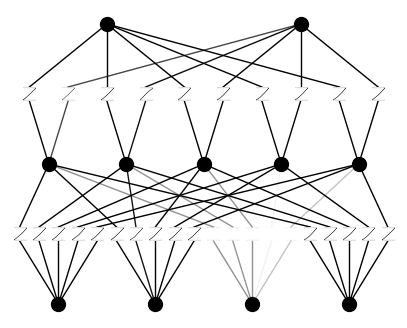

In [27]:
model(input)
model.plot(beta=100)

### model.train函数介绍
这个函数的文档解释了`training`函数的各个参数。以下是对每个参数的详细解释：

1. `dataset` : `dict`
    - 包含训练和测试数据集，字典结构如下：
        - `dataset['train_input']`: 训练输入数据
        - `dataset['train_label']`: 训练标签数据
        - `dataset['test_input']`: 测试输入数据
        - `dataset['test_label']`: 测试标签数据

2. `opt` : `str`
    - 优化器类型，值可以是 "LBFGS" 或 "Adam"，决定了使用的优化算法。

3. `steps` : `int`
    - 训练步骤数，表示训练过程中的总步数。

4. `log` : `int`
    - 日志记录频率，表示每隔多少步记录一次日志信息。

5. `lamb` : `float`
    - 总体惩罚强度系数，用于正则化项的总体惩罚。

6. `lamb_l1` : `float`
    - L1惩罚强度系数，用于稀疏化正则化。

7. `lamb_entropy` : `float`
    - 熵惩罚强度系数，用于熵正则化。

8. `lamb_coef` : `float`
    - 系数大小惩罚强度系数，用于控制系数大小的正则化。

9. `lamb_coefdiff` : `float`
    - 相邻系数差异（平滑性）惩罚强度系数，用于控制相邻系数差异的正则化。

10. `update_grid` : `bool`
    - 是否定期更新网格。如果为 `True`，则在特定步骤前定期更新网格。

11. `grid_update_num` : `int`
    - 在停止网格更新步骤之前，网格更新的次数。

12. `stop_grid_update_step` : `int`
    - 在此步骤之后不再更新网格。

13. `batch` : `int`
    - 批量大小。如果值为 -1，则使用整个数据集进行训练（即全量批次）。

14. `small_mag_threshold` : `float`
    - 确定大小数的阈值（可能对小数施加较大的惩罚）。

15. `small_reg_factor` : `float`
    - 对小因子相对于大因子的惩罚强度。

16. `device` : `str`
    - 计算设备，例如 "cpu" 或 "cuda"（用于指定运行训练的硬件设备）。

17. `save_fig_freq` : `int`
    - 每隔多少步保存一次图像。

这些参数共同定义了训练过程中的数据、优化策略、正则化方法、批量处理方式以及日志记录和图像保存的频率。

train loss: 1.97e-01 | test loss: 2.36e-01 | reg: 4.78e+01 : 100%|█| 100/100 [00:03<00:00, 30.19it/s


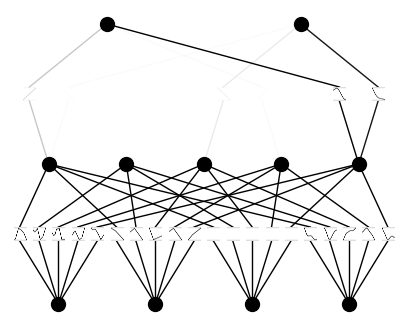

In [28]:
# train the model
model.train(dataset, opt="Adam", steps=100, lamb=0.01, lamb_entropy=10.);
model.plot(beta=100)

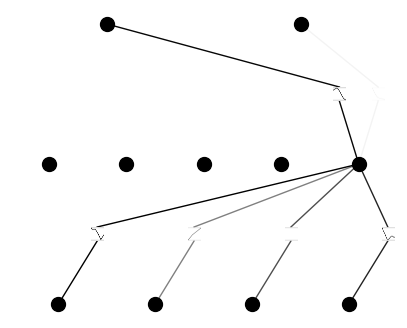

In [29]:
model.prune()
model.plot(mask=True)

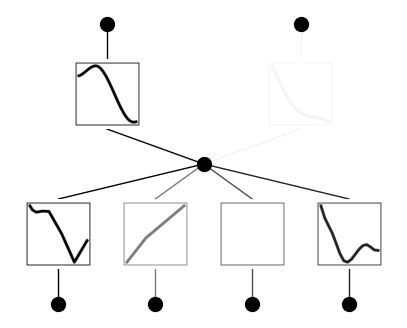

In [30]:
model = model.prune()
model(dataset['train_input'])
model.plot()

In [31]:
model.train(dataset, opt="LBFGS", steps=50)

train loss: 7.08e-02 | test loss: 1.04e-01 | reg: 9.10e+00 : 100%|██| 50/50 [00:06<00:00,  8.23it/s]


{'train_loss': [array(0.12280331, dtype=float32),
  array(0.08735084, dtype=float32),
  array(0.08048314, dtype=float32),
  array(0.07403114, dtype=float32),
  array(0.07108011, dtype=float32),
  array(0.07451895, dtype=float32),
  array(0.07357714, dtype=float32),
  array(0.07298142, dtype=float32),
  array(0.07255003, dtype=float32),
  array(0.07203738, dtype=float32),
  array(0.0721736, dtype=float32),
  array(0.07173264, dtype=float32),
  array(0.07150538, dtype=float32),
  array(0.07110371, dtype=float32),
  array(0.0709627, dtype=float32),
  array(0.071377, dtype=float32),
  array(0.07125307, dtype=float32),
  array(0.07117721, dtype=float32),
  array(0.07105687, dtype=float32),
  array(0.07086688, dtype=float32),
  array(0.07113494, dtype=float32),
  array(0.07104881, dtype=float32),
  array(0.07091959, dtype=float32),
  array(0.07078154, dtype=float32),
  array(0.07072128, dtype=float32),
  array(0.07107248, dtype=float32),
  array(0.0709782, dtype=float32),
  array(0.0708788, 

In [32]:
mode = "auto" # "manual"

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,0,'sin');
    model.fix_symbolic(0,1,0,'x^2');
    model.fix_symbolic(1,0,0,'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)

fixing (0,0,0) with sin, r2=0.5431965589523315
fixing (0,1,0) with x^4, r2=1.0000007152557373
fixing (0,2,0) with exp, r2=2.56923877109838e-26
fixing (0,3,0) with x^4, r2=0.9412616491317749
fixing (1,0,0) with sin, r2=0.9745855331420898
fixing (1,0,1) with sin, r2=0.9569023251533508


In [35]:
model.auto_symbolic(lib=['exp','sin','x^2','x^4',])
model.train(dataset, opt='LBFGS', steps=50, lamb=0.0, update_grid=False)
model.symbolic_formula()

skipping (0,0,0) since already symbolic
skipping (0,1,0) since already symbolic
skipping (0,2,0) since already symbolic
skipping (0,3,0) since already symbolic
skipping (1,0,0) since already symbolic
skipping (1,0,1) since already symbolic


train loss: 5.23e-01 | test loss: 4.59e-01 | reg: 4.17e+01 : 100%|██| 50/50 [00:01<00:00, 42.50it/s]


([0.55 - 0.28*sin(15.27*(0.67 - x_2)**4 - 0.06*(1 - 0.64*x_4)**4 + 0.48*sin(5.58*x_1 + 3.61) + 13.76 - 0.05*exp(-10.0*x_3)),
  0.37 - 1.44*sin(34.05*(0.67 - x_2)**4 - 0.12*(1 - 0.64*x_4)**4 + 1.07*sin(5.58*x_1 + 3.61) + 28.36 - 0.11*exp(-10.0*x_3))],
 [x_1, x_2, x_3, x_4])

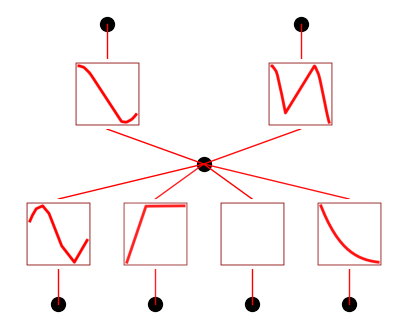

In [36]:
model.plot()

In [22]:
model.auto_symbolic(lib=['exp','sin','x^2','x^3','x^4','log','sqrt','tanh','abs','x'])
model.train(dataset, opt='LBFGS', steps=50, lamb=0.00, update_grid=False)
model.symbolic_formula()

skipping (0,0,0) since already symbolic
skipping (0,1,0) since already symbolic
skipping (0,2,0) since already symbolic
skipping (0,3,0) since already symbolic
skipping (1,0,0) since already symbolic
skipping (1,0,1) since already symbolic


train loss: nan | test loss: nan | reg: nan : 100%|█████████████████| 50/50 [00:07<00:00,  6.85it/s]


([nan, nan], [x_1, x_2, x_3, x_4])

In [12]:
model.symbolic_formula(floating_digit=4)

([0.0542 - 0.0421*sin(60.1977*sin(2.763*x_2 + 5.7611) + 0.0121*sin(0.7205*x_4 - 2.8955) + 0.023*Abs(9.9997*x_1 + 9.9999) - 0.0218*Abs(9.9984*x_3 + 9.9997) + 359.956),
  0.5583 - 0.5271*sin(45.0255*sin(2.763*x_2 + 5.7611) + 0.009*sin(0.7205*x_4 - 2.8955) + 0.0172*Abs(9.9997*x_1 + 9.9999) - 0.0163*Abs(9.9984*x_3 + 9.9997) + 262.6852)],
 [x_1, x_2, x_3, x_4])